### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
df = pd.read_csv('data/cleaned_df.csv', index_col = 'Unnamed: 0')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16457 entries, 0 to 16791
Data columns (total 19 columns):
Name                   12450 non-null object
Type                   16457 non-null object
Breed                  16457 non-null object
Color                  16457 non-null object
Sex                    16457 non-null object
Size                   16457 non-null object
Animal ID              16457 non-null object
Days in Shelter        16457 non-null int64
Intake Type            16457 non-null object
Intake Subtype         16457 non-null object
Outcome Type           16457 non-null object
Intake Condition       16457 non-null object
Intake Jurisdiction    16457 non-null object
PredomBreed            16457 non-null object
PredomColor            16457 non-null object
DOB                    12680 non-null object
IntakeDate             16457 non-null object
IntakeAge              12680 non-null object
IntakeAgeYrs           16457 non-null float64
dtypes: float64(1), int64(1), object

In [5]:
df.describe()

,Days in Shelter,IntakeAgeYrs
count,16457.000000,16457.000000
mean,17.153734,2.415546
std,28.458548,3.880925
min,0.000000,-1.000000
25%,1.000000,0.080000
50%,9.000000,0.950000
75%,22.000000,3.770000
max,791.000000,25.950000


In [6]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Animal ID',
       'Days in Shelter', 'Intake Type', 'Intake Subtype', 'Outcome Type',
       'Intake Condition', 'Intake Jurisdiction', 'PredomBreed', 'PredomColor',
       'DOB', 'IntakeDate', 'IntakeAge', 'IntakeAgeYrs'],
      dtype='object')

# Feature Engineering

In [7]:
df.drop(['Name','Breed','Color','Animal ID','DOB','IntakeDate','IntakeAge','Intake Condition','Days in Shelter'], axis=1, inplace=True)

In [8]:
df.head()

,Type,Sex,Size,Intake Type,Intake Subtype,Outcome Type,Intake Jurisdiction,PredomBreed,PredomColor,IntakeAgeYrs
0,OTHER,Unknown,SMALL,QUARANTINE,FLD_STRAY,EUTHANIZE,*SEBASTOPOL,BAT,BROWN,-1.00
1,CAT,Female,SMALL,STRAY,FIELD,EUTHANIZE,SANTA ROSA,DOMESTIC SH,CREAM,-1.00
2,OTHER,Unknown,SMALL,QUARANTINE,FLD_STRAY,EUTHANIZE,SANTA ROSA,BAT,BLACK,-1.00
3,CAT,Spayed,MED,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,SANTA ROSA,DOMESTIC MH,WHITE,8.01
4,CAT,Female,SMALL,STRAY,OVER THE COUNTER,EUTHANIZE,SANTA ROSA,DOMESTIC SH,CALICO,13.01


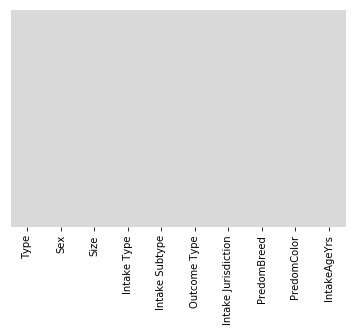

In [9]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [10]:
df.reset_index(drop=True, inplace=True)

## Label & One Hot Encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures

In [ ]:
# from collections import defaultdict

In [ ]:
# d = defaultdict(LabelEncoder)

In [ ]:
# Encoding the variable
# fit = df.drop(['IntakeAgeYrs'], axis=1).apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
# encoded = df.drop(['IntakeAgeYrs'], axis=1).apply(lambda x: d[x.name].transform(x))

In [12]:
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(df[['Type', 'Sex', 'Size', 'Intake Type', 'Intake Subtype',
       'Intake Jurisdiction', 'PredomBreed', 'PredomColor']]).toarray()
feature_labels = ohe.categories_

In [13]:
features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names())

In [14]:
features.head()

,x0_CAT,x0_DOG,x0_OTHER,x1_Female,x1_Male,x1_Neutered,x1_Spayed,x1_Unknown,x2_KITTN,x2_LARGE,x2_MED,x2_PUPPY,x2_SMALL,x2_TOY,x2_X-LRG,x3_ADOPTION RETURN,x3_CONFISCATE,x3_OWNER SURRENDER,x3_QUARANTINE,x3_STRAY,x3_TRANSFER,x4_BORN_HERE,x4_COMM CAT,x4_FIELD,x4_FIELD_OS,x4_FIELD_RETURN TO OWNER,x4_FLD_ARREST,x4_FLD_CORONR,x4_FLD_CRUEL,x4_FLD_EVICT,x4_FLD_HOSPTL,x4_FLD_LIVSTK,x4_FLD_STRAY,x4_MUN_SHELT,x4_OVER THE COUNTER,x4_OVER THE COUNTER_ARREST,x4_OVER THE COUNTER_CORONR,x4_OVER THE COUNTER_EVICT,x4_OVER THE COUNTER_OS,x4_OVER THE COUNTER_RETURN TO OWNER,x4_OVER THE COUNTER_STRAY,x4_PHONE,x4_PRIV_SHELT,x4_RESCUE_GRP,x4_VET_HOSP,x5_*CLOVERDALE,x5_*COTATI,x5_*HEALDSBURG,x5_*PETALUMA,x5_*ROHNERT PARK,x5_*SEBASTOPOL,x5_*SONOMA,x5_*TRIBAL RESV,x5_COUNTY,x5_OUT OF COUNTY,x5_SANTA ROSA,x5_UNKNOWN,x5_WINDSOR,x6_ALASKAN HUSKY,x6_AMERICAN,x6_AMERICAN STAFF,x6_AUST CATTLE DOG,x6_AUST KELPIE,x6_AUST SHEPHERD,x6_BAT,x6_BEAGLE,x6_BORDER COLLIE,x6_BOSTON TERRIER,x6_BOXER,x6_BULLDOG,x6_CAIRN TERRIER,x6_CATAHOULA,x6_CHICKEN,x6_CHIHUAHUA,x6_COCKATIEL,x6_COCKER SPAN,x6_DACHSHUND,x6_DOBERMAN PINSCH,x6_DOMESTIC LH,x6_DOMESTIC MH,x6_DOMESTIC SH,x6_ENGLISH SPOT,x6_FOX TERRIER,x6_GERM SHEPHERD,x6_GOAT,x6_GOLDEN RETR,x6_GREAT PYRENEES,x6_GUINEA PIG,x6_HAMSTER,x6_HORSE,x6_KOI,x6_LABRADOR RETR,x6_LOP,x6_MALTESE,x6_MASTIFF,x6_MIN PINSCHER,x6_OTHER,x6_PARAKEET,x6_PARSON RUSS TER,x6_PIG,x6_PIT BULL,x6_POMERANIAN,x6_POODLE,x6_PUG,x6_RABBIT,x6_RAT,x6_RAT TERRIER,x6_REX,x6_ROTTWEILER,x6_SCHNAUZER,x6_SHEEP,x6_SHIH TZU,x6_SIAMESE,x6_SIBERIAN HUSKY,x6_YORKSHIRE TERR,x7_BLACK,x7_BLUE,x7_BROWN,x7_BUFF,x7_CALICO,x7_CHOCOLATE,x7_CREAM,x7_FAWN,x7_GOLD,x7_GRAY,x7_LYNX,x7_ORANGE,x7_OTHER,x7_RED,x7_SEAL PT,x7_TAN,x7_TORTIE,x7_TRICOLOR,x7_WHITE,x7_YELLOW
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [15]:
features = pd.concat([features,df['IntakeAgeYrs'].copy()], axis=1)

In [16]:
le = LabelEncoder()

In [17]:
target = pd.DataFrame(le.fit_transform(df['Outcome Type']), columns=['Outcome Type'])

In [18]:
target.head()

,Outcome Type
0,1
1,1
2,1
3,1
4,1


In [19]:
modeling = pd.concat([features, target], axis=1)

In [20]:
modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Columns: 137 entries, x0_CAT to Outcome Type
dtypes: float64(136), int64(1)
memory usage: 17.2 MB


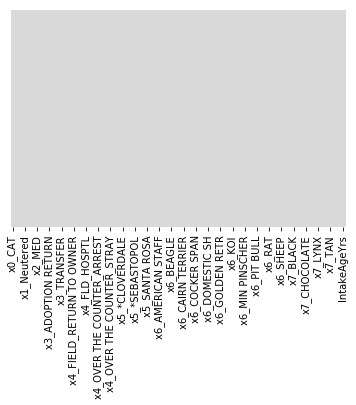

In [21]:
sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(modeling.drop('Outcome Type', axis=1), modeling['Outcome Type'], test_size=0.2, random_state=42)

# Scale Data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [28]:
ss.fit(np.array(X_train['IntakeAgeYrs']).reshape(-1, 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
X_train_intakeage = ss.transform(np.array(X_train['IntakeAgeYrs']).reshape(-1,1))
X_test_intakeage = ss.transform(np.array(X_train['IntakeAgeYrs']).reshape(-1,1))

In [31]:
pd.concat([X_train.drop('IntakeAgeYrs', axis=1),pd.DataFrame(X_train_intakeage)])

,x0_CAT,x0_DOG,x0_OTHER,x1_Female,x1_Male,x1_Neutered,x1_Spayed,x1_Unknown,x2_KITTN,x2_LARGE,x2_MED,x2_PUPPY,x2_SMALL,x2_TOY,x2_X-LRG,x3_ADOPTION RETURN,x3_CONFISCATE,x3_OWNER SURRENDER,x3_QUARANTINE,x3_STRAY,x3_TRANSFER,x4_BORN_HERE,x4_COMM CAT,x4_FIELD,x4_FIELD_OS,x4_FIELD_RETURN TO OWNER,x4_FLD_ARREST,x4_FLD_CORONR,x4_FLD_CRUEL,x4_FLD_EVICT,x4_FLD_HOSPTL,x4_FLD_LIVSTK,x4_FLD_STRAY,x4_MUN_SHELT,x4_OVER THE COUNTER,x4_OVER THE COUNTER_ARREST,x4_OVER THE COUNTER_CORONR,x4_OVER THE COUNTER_EVICT,x4_OVER THE COUNTER_OS,x4_OVER THE COUNTER_RETURN TO OWNER,x4_OVER THE COUNTER_STRAY,x4_PHONE,x4_PRIV_SHELT,x4_RESCUE_GRP,x4_VET_HOSP,x5_*CLOVERDALE,x5_*COTATI,x5_*HEALDSBURG,x5_*PETALUMA,x5_*ROHNERT PARK,x5_*SEBASTOPOL,x5_*SONOMA,x5_*TRIBAL RESV,x5_COUNTY,x5_OUT OF COUNTY,x5_SANTA ROSA,x5_UNKNOWN,x5_WINDSOR,x6_ALASKAN HUSKY,x6_AMERICAN,x6_AMERICAN STAFF,x6_AUST CATTLE DOG,x6_AUST KELPIE,x6_AUST SHEPHERD,x6_BAT,x6_BEAGLE,x6_BORDER COLLIE,x6_BOSTON TERRIER,x6_BOXER,x6_BULLDOG,x6_CAIRN TERRIER,x6_CATAHOULA,x6_CHICKEN,x6_CHIHUAHUA,x6_COCKATIEL,x6_COCKER SPAN,x6_DACHSHUND,x6_DOBERMAN PINSCH,x6_DOMESTIC LH,x6_DOMESTIC MH,x6_DOMESTIC SH,x6_ENGLISH SPOT,x6_FOX TERRIER,x6_GERM SHEPHERD,x6_GOAT,x6_GOLDEN RETR,x6_GREAT PYRENEES,x6_GUINEA PIG,x6_HAMSTER,x6_HORSE,x6_KOI,x6_LABRADOR RETR,x6_LOP,x6_MALTESE,x6_MASTIFF,x6_MIN PINSCHER,x6_OTHER,x6_PARAKEET,x6_PARSON RUSS TER,x6_PIG,x6_PIT BULL,x6_POMERANIAN,x6_POODLE,x6_PUG,x6_RABBIT,x6_RAT,x6_RAT TERRIER,x6_REX,x6_ROTTWEILER,x6_SCHNAUZER,x6_SHEEP,x6_SHIH TZU,x6_SIAMESE,x6_SIBERIAN HUSKY,x6_YORKSHIRE TERR,x7_BLACK,x7_BLUE,x7_BROWN,x7_BUFF,x7_CALICO,x7_CHOCOLATE,x7_CREAM,x7_FAWN,x7_GOLD,x7_GRAY,x7_LYNX,x7_ORANGE,x7_OTHER,x7_RED,x7_SEAL PT,x7_TAN,x7_TORTIE,x7_TRICOLOR,x7_WHITE,x7_YELLOW,0
13408,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5815,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2578,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7315,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4035,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

# Interaction Features

In [ ]:
# features = modeling.drop(['Outcome Type'], axis = 1).copy()

In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [ ]:
features = pd.DataFrame(poly.fit_transform(features), columns=poly.get_feature_names(input_features=features.columns))

In [ ]:
features.info()

In [ ]:
modeling = pd.concat([features, modeling['Outcome Type']],axis=1)

In [ ]:
# sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [ ]:
# modeling.to_csv('encoded_data_v3.csv')

# Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(.92)

In [ ]:
pca.fit(X_train)

In [ ]:
pca.n_components_

In [ ]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

# Over Sampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(sampling_strategy='not majority', random_state=23, n_jobs = -1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [ ]:
unique_elements, counts_elements = np.unique(y_train_sm, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

# Models

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

### Without upsampled training data

In [ ]:
lr = LogisticRegression(penalty='l2',C=1.0,fit_intercept=False,random_state=10,solver='lbfgs',multi_class='multinomial',verbose=8,n_jobs=-1)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [ ]:
print('f1 train: ', f1_score(y_train, pred_train, average='micro'))
print('f1 test: ', f1_score(y_test, pred_test, average='micro'))
print('Accuracy test: ', accuracy_score(y_test, pred_test))

In [ ]:
cm_lr = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Baseline Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
le.inverse_transform([0,1,2,3])

### With Upsampled training data

In [ ]:
lr_sm = LogisticRegression(penalty='l2',C=1.0,fit_intercept=False,random_state=10,solver='lbfgs',multi_class='multinomial',verbose=8,n_jobs=-1)

In [ ]:
lr_sm.fit(X_train_sm,y_train_sm)

In [ ]:
pred_train_lrsm = lr_sm.predict(X_train)
pred_test_lrsm = lr_sm.predict(X_test)

In [ ]:
print('f1 train: ', f1_score(y_train, pred_train_lrsm, average='micro'))
print('f1 test: ', f1_score(y_test, pred_test_lrsm, average='micro'))
print('Accuracy test: ', accuracy_score(y_test, pred_test_lrsm))


In [ ]:
cm_lrsm = confusion_matrix(y_test, pred_test_lrsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_lrsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

### Without Upsampling

In [ ]:
params_rfc = dict(n_estimators=[85,90,95],max_depth=[11,12,13],min_samples_leaf=[.00001,.00005,.00007])

In [ ]:
rs_rfc = RandomizedSearchCV(rfc, params_rfc, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [ ]:
rs_rfc.fit(X_train,y_train)

In [ ]:
rs_rfc.best_params_

In [ ]:
pred_train_rfc = rs_rfc.best_estimator_.predict(X_train)
pred_test_rfc = rs_rfc.best_estimator_.predict(X_test)

In [ ]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_rfc))
print('Accuracy test: ', accuracy_score(y_test, pred_test_rfc))

In [ ]:
cm_rfc = confusion_matrix(y_test, pred_test_rfc)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_rfc, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Random Forrest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
# importance_rfc = 
rs_rfc.best_estimator_.feature_importances_

In [ ]:


# Sort feature importances in descending order
indices = np.argsort(importance_rfc)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [modeling.drop('Outcome Type', axis=1).columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(len(modeling.drop('Outcome Type', axis=1).columns)), importance_rfc[indices])
# Add feature names as x-axis labels
plt.xticks(range(len(modeling.drop('Outcome Type', axis=1).columns)), names, rotation=90)
# Show plot
plt.show()

### With Upsampling

In [ ]:
params_rfcsm = dict(n_estimators=[100,150,200],max_depth=[5,10,15],min_samples_leaf=[.00001,.00005,.0001])

In [ ]:
rs_rfcsm = RandomizedSearchCV(rfc, params_rfcsm, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [ ]:
rs_rfcsm.fit(X_train_sm,y_train_sm)

In [ ]:
rs_rfcsm.best_params_

In [ ]:
pred_train_rfcsm = rs_rfcsm.best_estimator_.predict(X_train)
pred_test_rfcsm = rs_rfcsm.best_estimator_.predict(X_test)

In [ ]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_rfcsm))
print('Accuracy test: ', accuracy_score(y_test, pred_test_rfcsm))

In [ ]:
cm_rfcsm = confusion_matrix(y_test, pred_test_rfcsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_rfcsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Random Forrest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
importance_rfcsm = rs_rfcsm.best_estimator_.feature_importances_

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importance_rfcsm)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [modeling.drop('Outcome Type', axis=1).columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(len(modeling.drop('Outcome Type', axis=1).columns)), importance_rfcsm[indices])
# Add feature names as x-axis labels
plt.xticks(range(len(modeling.drop('Outcome Type', axis=1).columns)), names, rotation=90)
# Show plot
plt.show()

In [ ]:
names

## XGBoosted

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(objective='multi:softmax',booster='gbtree')

### Without Upsampling

In [ ]:
params_xgb = dict(max_depth=[3,5,10],learning_rate=[.05,0.1,.3],n_estimators=[50,100,150])

In [ ]:
rs_xgb = RandomizedSearchCV(xgb, params_xgb, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [ ]:
rs_xgb.fit(X_train,y_train)

In [ ]:
rs_xgb.best_params_

In [ ]:
pred_train_xgb = rs_xgb.best_estimator_.predict(X_train)
pred_test_xgb = rs_xgb.best_estimator_.predict(X_test)

In [ ]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_xgb))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgb))

In [ ]:
cm_xgb = confusion_matrix(y_test, pred_test_xgb)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgb, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
rs_xgb.best_estimator_

In [ ]:
import pickle

In [ ]:
model_pickle_path = 'xgboost_model.pkl'

# Create an variable to pickle and open it in write mode
model_pickle = open(model_pickle_path, 'wb')
pickle.dump(rs_xgb, model_pickle)
model_pickle.close()

In [ ]:
importance = rs_xgb.best_estimator_.feature_importances_

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [modeling.drop('Outcome Type', axis=1).columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(len(modeling.drop('Outcome Type', axis=1).columns)), importance[indices])
# Add feature names as x-axis labels
plt.xticks(range(len(modeling.drop('Outcome Type', axis=1).columns)), names, rotation=90)
# Show plot
plt.show()

In [ ]:
list(zip(names,importance[indices]))

In [ ]:
bestfeats = names[:27]

### With less features

In [ ]:
rs_xgbimp = RandomizedSearchCV(xgb, params_xgb, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [ ]:
rs_xgbimp.fit(X_train[bestfeats],y_train)

In [ ]:
rs_xgbimp.best_params_

In [ ]:
pred_train_xgbimp = rs_xgbimp.best_estimator_.predict(X_train[bestfeats])
pred_test_xgbimp = rs_xgbimp.best_estimator_.predict(X_test[bestfeats])

In [ ]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_xgbimp))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgbimp))

In [ ]:
cm_xgbimp = confusion_matrix(y_test, pred_test_xgbimp)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgbimp, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('XGBoost Reduced Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [ ]:
import xgboost as xg

In [ ]:
data_dmatrix = xg.DMatrix(data=X_train_sm,label=y_train_sm)

In [ ]:
params = {"objective":"multi:softmax","num_class":4,'colsample_bytree': 0.3,'learning_rate': 0.2,
                'max_depth': 2, 'alpha': 10}

cv_results = xg.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=500,early_stopping_rounds=5,
                   metrics="merror", as_pandas=True, seed=123,verbose_eval=5)
cv_results 

In [ ]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xg.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xg.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='merror')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))


    return alg

In [ ]:
xgbsm = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',learning_rate=.2, max_depth=3,colsample_bytree=.3)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2,colsample_bytree=.3, n_estimators=159,gamma=0, subsample=0.8, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch1.fit(X_train_sm,y_train_sm)

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2 = {
 'max_depth':[8,9,10],
 'min_child_weight':[1,2,3]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2,colsample_bytree=.3, n_estimators=99,gamma=0, subsample=0.8, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test2, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch2.fit(X_train_sm,y_train_sm)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2,colsample_bytree=.3, n_estimators=99, subsample=0.8, 
                                    max_depth=9, min_child_weight=1, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test3, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch3.fit(train[predictors],train[target])

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

In [ ]:
param_test4 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2, n_estimators=99, max_depth=9, min_child_weight=1, gamma=.3, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test4, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch4.fit(train[predictors],train[target])

In [ ]:
gsearch4.best_params_, gsearch4.best_score_

In [ ]:
list(zip(predictors,gsearch4.best_estimator_.feature_importances_))

In [ ]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2, n_estimators=99, max_depth=9, min_child_weight=1, gamma=.3, 
                                    nthread=4, scale_pos_weight=1, colsample_bytree=0.8, subsample=0.9,seed=27), 
                        param_grid = param_test6, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch6.fit(train[predictors],train[target])

In [ ]:
gsearch6.best_params_, gsearch6.best_score_

In [ ]:
list(zip(predictors,gsearch6.best_estimator_.feature_importances_))

In [ ]:
param_test7 = {
 'reg_alpha':[0.005, 0.01, 0.05, 0.1, 0.15]
}

gsearch7 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2, n_estimators=99, max_depth=9, min_child_weight=1, gamma=.3, 
                                    nthread=4, scale_pos_weight=1, colsample_bytree=0.8, subsample=0.9,seed=27), 
                        param_grid = param_test7, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch7.fit(train[predictors],train[target])

In [ ]:
gsearch7.best_params_, gsearch7.best_score_

In [ ]:
param_test8 = {
 'reg_alpha':[0,0.001, 0.005]
}

gsearch8 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2, n_estimators=99, max_depth=9, min_child_weight=1, gamma=.3, 
                                    nthread=4, scale_pos_weight=1, colsample_bytree=0.8, subsample=0.9,seed=27), 
                        param_grid = param_test8, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch8.fit(train[predictors],train[target])

In [ ]:
gsearch8.best_params_, gsearch8.best_score_

In [ ]:
xgb2=XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',learning_rate=.05, n_estimators=5000, 
    max_depth=9, min_child_weight=1, gamma=.3, reg_alpha=0,nthread=4, scale_pos_weight=1, colsample_bytree=0.8, 
    subsample=0.9,seed=27)

modelfit(xgb2, train, predictors,target)

In [ ]:
xgb2.fit(X_train_sm[predictors],y_train_sm)

In [ ]:
pred_train_xgbsm = gsearch8.best_estimator_.predict(X_train_sm[predictors])
pred_test_xgbsm = gsearch8.best_estimator_.predict(X_test[predictors])

In [ ]:
print('Accuracy train: ', accuracy_score(y_train_sm, pred_train_xgbsm))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgbsm))

In [ ]:
cm_xgbsm = confusion_matrix(y_test, pred_test_xgbsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgbsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
plt.figure(figsize=(12,8))
mask = np.zeros_like(modeling.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(modeling.corr(), mask=mask)

In [ ]:
plt.figure(figsize=(12,8))
mask = np.zeros_like(modeling.drop(todrop, axis=1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(modeling.drop(todrop, axis=1).corr(), mask=mask)